In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
from inspector import Inspector
from tqdm import tqdm
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
config = load_config_and_check("../config/qfl_v00.yaml")

In [4]:
PATH_TESTED = os.path.join(
    config["experiment_folder"], "programs", "metadata"
)
metadata_files = [
    os.path.join(PATH_TESTED, filename) 
    for filename in os.listdir(PATH_TESTED)
    if not filename.endswith("_exec.json")
]
metadata_files[:10]

['../data/qfl_v00/programs/metadata/3609ac949618472bb6857d359999c2cf.json',
 '../data/qfl_v00/programs/metadata/3500e0b90b4842c1876f5cc900bef734.json',
 '../data/qfl_v00/programs/metadata/cfd51249268e489aad7dc4484ba7c3d5.json',
 '../data/qfl_v00/programs/metadata/913f568e7fef43a19db2675417a01e52.json',
 '../data/qfl_v00/programs/metadata/ce8324545ff84047ae618f1ce1ae2ff3.json',
 '../data/qfl_v00/programs/metadata/c73f02d1e5f149a386334990fdd7c5b6.json',
 '../data/qfl_v00/programs/metadata/c242e783799147e79efc9d9c87680816.json',
 '../data/qfl_v00/programs/metadata/1788609540e94adb89e0cb88edba062c.json',
 '../data/qfl_v00/programs/metadata/bdc63e3b3db04fb0a496b4c594a13302.json',
 '../data/qfl_v00/programs/metadata/9f179d7c4dee462f95c6cb3f80c79dab.json']

In [6]:
def pandize(file_list):
    """Create a pandas dataframe with the json file passed."""
    records = []
    for filepaths in tqdm(file_list):
        with open(filepaths, 'r') as in_file:
            data = json.load(in_file)
        records.append(data)
    return pd.json_normalize(records)
    # return pd.DataFrame.from_records(records)
    
df = pandize(file_list=metadata_files)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15537/15537 [00:13<00:00, 1139.73it/s]


In [7]:
df.head()

,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,3609ac949618472bb6857d359999c2cf,"[qiskit, cirq]",8192,3609ac949618472bb6857d359999c2cf,../data/qfl_v00/programs/qasm/3609ac949618472b...,3,124,3,1,1,1,1,WeightedRandomCircuitGenerator,3609ac949618472bb6857d359999c2cf,seed_42,0.011353,0.666714
1,3500e0b90b4842c1876f5cc900bef734,"[qiskit, cirq]",8192,3500e0b90b4842c1876f5cc900bef734,../data/qfl_v00/programs/qasm/3500e0b90b4842c1...,18,102,3,1,1,1,1,WeightedRandomCircuitGenerator,3500e0b90b4842c1876f5cc900bef734,seed_42,0.015015,0.314258
2,cfd51249268e489aad7dc4484ba7c3d5,"[qiskit, cirq]",8192,cfd51249268e489aad7dc4484ba7c3d5,../data/qfl_v00/programs/qasm/cfd51249268e489a...,2,32,3,1,1,1,1,WeightedRandomCircuitGenerator,cfd51249268e489aad7dc4484ba7c3d5,seed_42,0.016846,0.195448
3,913f568e7fef43a19db2675417a01e52,"[qiskit, cirq]",8192,913f568e7fef43a19db2675417a01e52,../data/qfl_v00/programs/qasm/913f568e7fef43a1...,12,125,3,1,1,1,1,WeightedRandomCircuitGenerator,913f568e7fef43a19db2675417a01e52,seed_42,0.010498,0.757432
4,ce8324545ff84047ae618f1ce1ae2ff3,"[qiskit, cirq]",8192,ce8324545ff84047ae618f1ce1ae2ff3,../data/qfl_v00/programs/qasm/ce8324545ff84047...,5,66,3,1,1,1,1,WeightedRandomCircuitGenerator,ce8324545ff84047ae618f1ce1ae2ff3,seed_42,0.012817,0.511501


<AxesSubplot:xlabel='divergence.ks.statistic', ylabel='Count'>

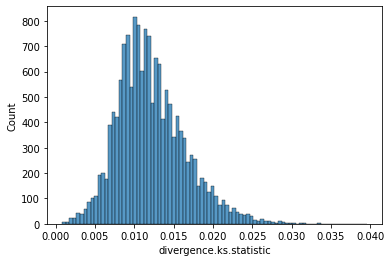

In [8]:
sns.histplot(
    data=df,
    x='divergence.ks.statistic'
)

<AxesSubplot:xlabel='divergence.ks.p-value', ylabel='Count'>

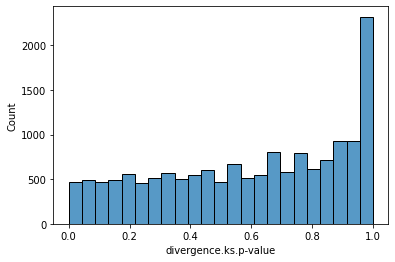

In [9]:
sns.histplot(
    data=df,
    x='divergence.ks.p-value'
)